# A FAIRE (LOUIS) : APPLIQUER TOUS LES TRAITEMENTS EGALEMENT SUR LE JEU DE DONNEES TEST

# Chargement des bibliothèques

In [1]:
# Classique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import os

# Import Yoann
import sys
import re
import string
!{sys.executable} -m pip install spacy
#import pandas as pd 
import re
import spacy
# !{sys.executable} -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

# géométrie/algèbre
import sympy
from sympy import symbols, Eq, solve

# NLP
#import spacy
#import re
#import string

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Editeur
import warnings
warnings.filterwarnings('ignore')

^C


# Chargement des données

In [2]:
url1 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/train.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
train = pd.read_csv(url1, sep=',') # lecture du dataframe 
train = train.sample(1000).reset_index(drop=True)
print(train.head())

     id              keyword                location  \
0  1117            blew%20up       H / pez & sophia    
1  9600              thunder               Macon, GA   
2  7288   nuclear%20disaster                      US   
3  1943  burning%20buildings  New Orleans ,Louisiana   
4  2758               curfew     antioch, california   

                                                text  target  
0                    FREYAS VIDEO BLEW UP EVERYWHERE       0  
1  #thunder outside my house this afternoon #gawx...       1  
2  3 Former Executives to Be Prosecuted in Fukush...       1  
3  Burning buildings? Media outrage? http://t.co/...       1  
4  @michelleellle ?? shut up freshman its past ur...       0  


In [3]:
url2 = 'https://raw.githubusercontent.com/Francois-lenne/Big-data-SIAD/main/test.csv' # le dataset est stocké dans un repo github afin d'avoir un lien dur sur la base
test = pd.read_csv(url2, sep=',') # lecture du dataframe 
test = test.sample(200).reset_index(drop=True)
print(test.head())

      id     keyword              location  \
0     87      ablaze  scarborough, ontario   
1   3384  demolition                   NaN   
2  10108    upheaval                   NaN   
3    414  apocalypse          Akron, Ohio    
4   8107     rescued            London, UK   

                                                text  
0  @CTVToronto the bins in front of the field by ...  
1  @Johnny_Detroit Tag Team for me was Demolition...  
2  @SushmaSwaraj Am sure background check of the ...  
3  @ItsKingRiffYall I'm excited for apocalypse re...  
4  So @edsheeran just rescued this year's #Fusion...  


# Analyse exploratoire

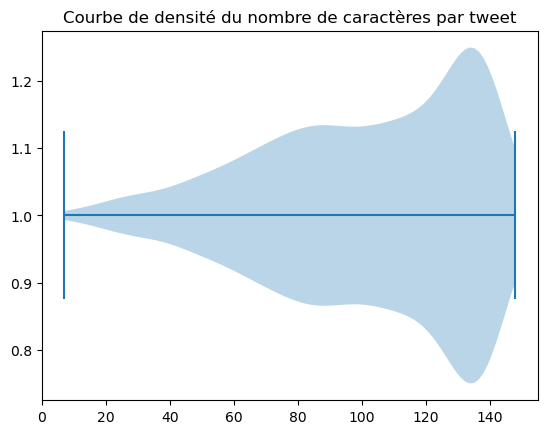

In [4]:
train['text_length'] = [len(text) for text in train['text']]
plt.violinplot(train['text_length'], vert = False)
plt.title('Courbe de densité du nombre de caractères par tweet')
plt.show()

In [5]:
train['keyword'].value_counts()

burning           11
suicide%20bomb    10
burned             9
fire               9
explode            9
                  ..
hostages           1
demolition         1
forest%20fires     1
eyewitness         1
catastrophic       1
Name: keyword, Length: 218, dtype: int64

In [6]:
train['location'].value_counts()

USA                    18
United States           9
New York                9
Nigeria                 9
Los Angeles, CA         5
                       ..
??+ ... ??+             1
Silver Spring, MD       1
Catalonia, Spain        1
July 11th, 2015. ?      1
Buscame EL tu Melte     1
Name: location, Length: 581, dtype: int64

# Extraction des parties des tweets


In [7]:
# Correction orthographique

# Conversion chiffres en texte

# Date

# Hashtag

# Liens hypertextes

# Contenu textuel

# Noms profils

# Enrichissement de la localisation

In [8]:
# Récupération des hashtag

def recupHashtag(text):
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupHashtagBinaire(text):
    rep = '0'
    reg = r"#(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep


In [9]:
def recupName(text):
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        ge_join = ' '.join(ge)
        return ge_join

def recupNameBinaire(text):
    rep = '0'
    reg = r"@(\w+)"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
        


In [10]:
def recupDate(text):
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
        ge = p.findall(text)
        return ge

def recupDateBinaire(text):
    rep = '0'
    reg = r"([A-Za-z]{3})\s(\d{1,2}),\s(\d{4})"
    p = re.compile(reg)
    check = re.search(reg,text)
    if check is not None:
      rep = '1'
    return rep
    


In [11]:
def getChemin(text):
    reg1 = r'(https?:\/\/[^\s]+)'
    reg2 = r'(https?)://([^:/]+)(?::(\d+))?(/[^?]*)?(\?[^#]*)?(#.*)?'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
        ge = p.findall(text)
        for val in ge:
            match = re.search(reg2,val)
            if match:
                rt = match.group(4)
            return rt

def getCheminBinaire(text):
    rep = '0'
    reg1 = r'(https?:\/\/[^\s]+)'
    p = re.compile(reg1)
    check = re.search(reg1,text)
    if check is not None:
      rep = '1'
    return rep

In [12]:
def getLocation(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            save.append(ent.text)
    return save

In [13]:
def getLocationBinaire(text):
    rep = "0"
    global nlp
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            rep = "1"
    return rep

In [14]:
def GPE(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("GPE" in save):
        GPE_exist = 1
    else:
        GPE_exist = 0
    return GPE_exist  

In [15]:
def NORP(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("NORP" in save):
        NORP_exist = 1
    else:
        NORP_exist = 0
    return NORP_exist   



In [16]:
def ORG(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("ORG" in save):
        ORG_exist = 1
    else:
        ORG_exist = 0
    return ORG_exist   



In [17]:
def DATE(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("DATE" in save):
        DATE_exist = 1
    else:
        DATE_exist = 0
    return DATE_exist   




In [18]:
def PERSON(text):
    global nlp
    save = []
    doc = nlp(text)
    for ent in doc.ents:
            save.append(ent.label_)
    if ("PERSON" in save):
        PERSON_exist = 1
    else:
        PERSON_exist = 0
    return PERSON_exist   


In [ ]:
train['hashtags'] = train['text'].apply(recupHashtag)
train['hashtags_b'] = train['text'].apply(recupHashtagBinaire)

train["GPE_exist"] = train["text"].apply(GPE)

train["NORP_exist"] = train["text"].apply(NORP)

train["ORG_exist"] = train["text"].apply(ORG)

train["DATE_exist"] = train["text"].apply(DATE)

train["PERSON_exist"] = train["text"].apply(PERSON)

train['names'] = train['text'].apply(recupName)
train['names_b'] = train['text'].apply(recupNameBinaire)

train['dates'] = train['text'].apply(recupDate)
train['dates_b'] = train['text'].apply(recupDateBinaire)

train['locations'] = train['text'].apply(getLocation)
train['locations_b'] = train['text'].apply(getLocationBinaire)

train['rt_path'] = train['text'].apply(getChemin)
train['rt_path_b'] = train['text'].apply(getCheminBinaire)

  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.9.0
    Uninstalling pydantic-1.9.0:
      Successfully uninstalled pydantic-1.9.0


In [ ]:
test['hashtags'] = test['text'].apply(recupHashtag)
test['hashtags_b'] = test['text'].apply(recupHashtagBinaire)

test['names'] = test['text'].apply(recupName)
test['names_b'] = test['text'].apply(recupNameBinaire)

test['dates'] = test['text'].apply(recupDate)
test['dates_b'] = test['text'].apply(recupDateBinaire)

test['locations'] = test['text'].apply(getLocation)
test['locations_b'] = test['text'].apply(getLocationBinaire)

test['rt_path'] = test['text'].apply(getChemin)
test['rt_path_b'] = test['text'].apply(getCheminBinaire)

In [ ]:
train

In [ ]:
pd.crosstab(train.rt_path, train.target, margins=True, margins_name="Total").sort_values('Total', ascending=False)

#Nettoyage du contenu textuel des tweets

## Prenettoyage

In [ ]:
# Expression régulières : ponctuation, chiffres, accents, majuscules, espaces en trop …
import re
def preprocessing(text):
    text = str(text)

    # Harmonisation - mise en minuscule
    text = text.lower()

    # Gestion des accents et ponctuations
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub("\d+", " ", text) # normalisation nombres
    text = re.sub('[éèê]', "e", text) # retrait accents
    text = re.sub("[.,;:!?]", " ", text)
    text = re.sub("[|{}\[\]()«»/]", " ", text)
    text = re.sub("[“”]", " ", text)
    text = re.sub("'", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub('"', " ", text)
    text = re.sub('[+-]', " ", text)
    text = re.sub('[=*/]', " ", text)
    text = re.sub("ô", "o", text)
    text = re.sub("°", "", text)

    # Gestion des symboles
    text = re.sub("[€%$£]", "", text)

    # Gestions des retours à la ligne ou fin de lignes
    text = re.sub('\r\n', " ", text)
    text = re.sub('\n', " ", text)

    # Gestion des espaces
    text = re.sub('\s+', " ", text) # espaces en trop
    text = text.rstrip(" ") # à droite
    text = text.lstrip(" ") # à gauche

    return text

In [ ]:
train['text_CLEAN'] = train['text'].apply(lambda x: preprocessing(x))
test['text_CLEAN'] = test['text'].apply(lambda x: preprocessing(x))
train[['text','text_CLEAN']].sample(10)

## Lemmatisation / Stemmisation

In [ ]:
# !pip install nltk
import nltk
# nltk.download('all')

In [ ]:
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download en_core_web_sm

In [ ]:
import tqdm
def Lemmatization(train,texts):
    pbar = tqdm.tqdm(total=train.shape[0])
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc: 
            new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
        pbar.update(1) # actualise la progress bar
    return (texts_out)
    pbar.close()

train['text_CLEAN_LMT'] = Lemmatization(train,train['text_CLEAN'])
test['text_CLEAN_LMT'] = Lemmatization(test,test['text_CLEAN'])
train[['text_CLEAN','text_CLEAN_LMT']].head()

In [ ]:
# Pour cette partie du traitement, les tweets doivent être décomposés en mots
def tokenize(text):
    text_split = [word for word in text.split()]
    return text_split

train['text_CLEAN_LMT_TOKEN'] = train['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
test['text_CLEAN_LMT_TOKEN'] = test['text_CLEAN_LMT'].apply(lambda x: tokenize(x))
train[['text_CLEAN_LMT','text_CLEAN_LMT_TOKEN']].head()

## Retrait des stopwords

In [ ]:
nlp = spacy.load('en_core_web_sm')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

stopwords = [word.lower() for word in stopwords]

# conservation de certains stopwords
liste = [
    # mots à conserver (à exclure de la liste des stopwords par défaut)
]

stopwords = [word for word in stopwords if word not in liste]

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if (len(word) > 2) and (word not in stopwords)]
    return text

train['text_CLEAN_LMT_TOKEN_WSW'] = train['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
test['text_CLEAN_LMT_TOKEN_WSW'] = test['text_CLEAN_LMT_TOKEN'].apply(lambda x: remove_stopwords(x))
train[['text_CLEAN_LMT_TOKEN','text_CLEAN_LMT_TOKEN_WSW']].head()

## Bigrammes - Trigrammes

S'effectue sur donneés tokenizées

Astuce : la construction des bigrammes peut s'effectuer en ignorant les stopwords grâce au paramètre "connector_words". Du coup on précise d'abord la liste des stopwords afin que ces stopwords ne se retrouvent pas dans des bigrammes.

In [ ]:
import gensim

### TRAIN

data_words_train = train['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_train

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_train, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_train], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Fonctions retournant les bigrammes/trigrammes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Crée les bigrammes
data_words_train_bigrams = make_bigrams(data_words_train)
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_train_bigrams
train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]


### TEST

data_words_test = test['text_CLEAN_LMT_TOKEN_WSW'].values.tolist()
data_words_test

# Modèles Bigrammes/Trigrammes
bigram = gensim.models.Phrases(data_words_test, min_count=5, threshold=0,
                              #  connector_words=stopwords,
                               scoring = 'npmi')
trigram = gensim.models.Phrases(bigram[data_words_test], threshold=0,
                              #  connector_words=stopwords,
                                scoring = 'npmi')

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Crée les bigrammes
data_words_test_bigrams = make_bigrams(data_words_test)
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'] = data_words_test_bigrams
test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'][:5]

## Detokenization

In [ ]:
def detokenize_text(txt):
    txt = ' '.join([word for word in txt])
    return txt

train['text_CLEAN_LMT_WSW_BIGRAMS'] = train['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
test['text_CLEAN_LMT_WSW_BIGRAMS'] = test['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS'].apply(lambda x: detokenize_text(x))
train[['text_CLEAN_LMT_TOKEN_WSW_BIGRAMS','text_CLEAN_LMT_WSW_BIGRAMS']].head()

# Modélisation

## Feature engineering

Ici la sélection de variable consiste à conserver ou non certains mots.

On peut supprimer les mots dont l'occurence est si rare que leur conservation serait source d'overfitting.

Pour choisir ces mots, on peut utiliser le TF_Itrain, une grandeur qui pondère la fréquence d'un mot au sein d'un texte par rapport à sa fréquence dans un ensemble de texte.

En résumé, un mot fréquent dans un texte mais qui l'est également dans tous les textes sera pénalisé, alors qu'un mot fréquent uniquement dans un texte sera favorisé. Cela permet de mettre en avant les mots qui aident à distinguer les textes entre eux, et donc contribuent à une meilleure classification.

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Création d'une table dont les colonnes sont les mots et les données sont les valeurs TF-Itrain
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS'].astype('U'))
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()

train_Tfidf = pd.DataFrame(dense, columns=feature_names)

# Détection des mots dont la valeur TF-Itrain est peu signifiante au sein du corpus

## Dataframe contenant chaque mot et leur TF-Itrain moyen
mean_Tfidf = []
for feature in train_Tfidf.columns.values:
    mean_Tfidf.append(np.mean(train_Tfidf[feature]))
    
train_mean_Tfidf = pd.DataFrame({'word': train_Tfidf.columns.values,'mean_Tfidf': mean_Tfidf})

## Liste contenant les mots dont le TF-Itrain moyen est inférieur à un seuil prédéfini
threshold = np.percentile(train_mean_Tfidf['mean_Tfidf'],10) # on retire les X % plus bas en terme de TF-Itrain
features_to_delete = train_mean_Tfidf['word'].loc[train_mean_Tfidf['mean_Tfidf'] < threshold]

## Suppression de ces mots des texts. On met à jour la liste des stopwords avec les mots rares que l'on souhaite exclure.
for feature in features_to_delete:
    stopwords.extend(feature)

# On tokenize, on supprime les stopwords, et on détokenize
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = [text.split() for text in train['text_CLEAN_LMT_WSW_BIGRAMS'].astype(str)]  # le as.type(str) convertit en texte car apres nettoyage, certains tweets ne contiennent parfois plus que des numéros 
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(remove_stopwords)
train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'] = train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'].apply(lambda x: detokenize_text(x))

# Affichage du nombre de features final
print('total de feature =', train_Tfidf.shape[1])
print(features_to_delete)

# Création d'un dataframe contenant les mots en tant que features TF-IDF
train_word_features = vectorizer.fit_transform(train['text_CLEAN_LMT_WSW_BIGRAMS_FILTERED'])
feature_names = vectorizer.get_feature_names_out()
dense = train_word_features.todense()
train_word_features = pd.DataFrame(dense, columns=feature_names)

##################################################################################################

# LE NOMBRE DE FEATURE DONNE UNE IDEE DE LA COMPLEXITE DU MODELE
# IL FAUT LE REDUIRE AU STRICT NECESSAIRE POUR GARANTIR UN BON POUVOIR DE GENERALISATION

##################################################################################################

##GridSearch

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 

from sklearn.model_selection import GridSearchCV

X_train = pd.concat([train_word_features, train[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

y_train = train['target']


#clf = RandomForestClassifier(n_estimators=5000, random_state=0)
pipe = Pipeline([
    ("TdIdf",TfidfTransformer()),
    ("scaler", StandardScaler(with_mean=False)), # mean = True ne fonctionne pas avec une sparse matrix (TD-IDF)

    # Modèle testé en premier (n'importe lequel)
    ("classifier", LogisticRegression(random_state=0))
    #("clf",clf)
    
])

param_grid = [
    # Régression Logistique (one vs rest)
    #{'classifier': [RandomForestClassifier(random_state=0)],
    # 'classifier__C': [1,10,100]},
    # {'classifier': [LogisticRegression(random_state=0)],
    #  'classifier__C': [1,10,100, 1000, 10000]},

    # Support Vector Machine
    {'classifier': [SVC(kernel='rbf', random_state=0, probability = True)],
     'classifier__C': [1,10,100]},
    
    # {'classifier': [MLPClassifier(random_state = 0,
    #                         max_iter = 10,
    #                         alpha = 1,
    #                         hidden_layer_sizes=(100,))]},
    #  {'classifier': [RandomForestClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [AdaBoostClassifier(n_estimators=100, random_state=0)]},
    #  {'classifier': [GradientBoostingClassifier(n_estimators=100, random_state=0)]},
             ]

grid = GridSearchCV(pipe, param_grid, verbose = 2, cv = 5) # verbose pour l'affichage du temps de traitement
grid.fit(X_train, y_train)

## Evaluation

In [ ]:
print('best model : ', grid.best_params_)
print('best cv score : ', grid.best_score_)

## Récupération des prédictions

In [ ]:
test_word_features = vectorizer.transform(test['text_CLEAN_LMT_WSW_BIGRAMS'].values.astype(str))
feature_names = vectorizer.get_feature_names_out()
dense = test_word_features.todense()
test_word_features = pd.DataFrame(dense, columns=feature_names)

X_test = pd.concat([test_word_features, test[['hashtags_b','names_b','rt_path_b','locations_b']]], axis='columns')

test_predictions_tab = pd.DataFrame(grid.predict(X_test)) \
                            .reset_index(drop=True).rename(columns={0 : 'target_prédite'})

test_probas_tab = pd.DataFrame(grid.predict_proba(X_test), columns=[grid.classes_])

test_results = pd.concat([test_predictions_tab,
                          test_probas_tab],
                          axis=1).dropna() # probas et prédictions

test_results.dropna().to_csv('test_results.csv',sep=';',encoding='utf-16')

test_results